# 2. Supervised Learning: Classification & Regression

In this notebook, we will explain the differences between classification and regression. We will provide examples for both and demonstrate how to perform linear regression, polynomial regression, and logistic regression. We will also explore basic classification models. This notebook serves as an introduction to supervised learning algorithms. We will explore these algorithms in more depth in a subsequent course.

## Differences Between Classification and Regression

- **Classification**: Classification is used when the output variable is a categorical value. The goal is to predict a discrete label given an input.
  
- **Regression**: Regression is used when the output variable is a continuous value. The goal is to predict a numerical value given an input.

## Examples

### Classification Examples
1. Predicting whether an email is spam or not spam.
2. Classifying images of animals into categories like dogs, cats, and birds.

### Regression Examples
1. Predicting the price of a house based on its features like size, location, and number of bedrooms.
2. Forecasting the future sales of a product based on past sales data.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generating linear data with Gaussian noise
np.random.seed(0)
X_linear = 2 * np.random.rand(100, 1)
y_linear = 4 + 3 * X_linear + np.random.randn(100, 1)  # Gaussian noise added

# Generating polynomial data with Gaussian noise
X_poly = np.random.rand(100, 1) * 10 - 5
y_poly = 2 * X_poly**2 + 3 * X_poly + 4 + 10 * np.random.randn(100, 1)  # More pronounced Gaussian noise added

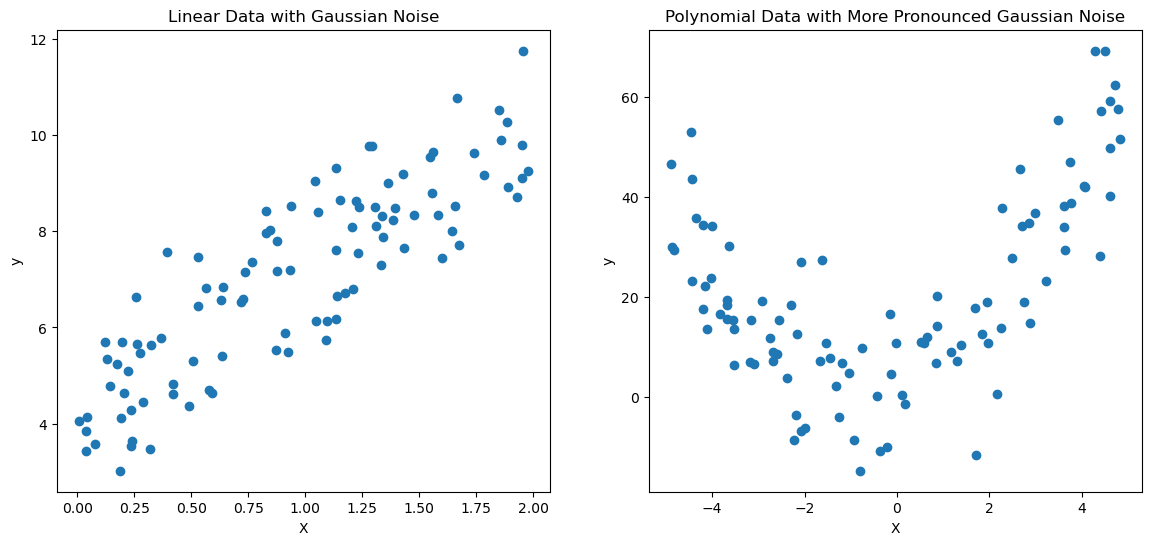

In [24]:
# Plotting linear data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_linear, y_linear)
plt.title('Linear Data with Gaussian Noise')
plt.xlabel('X')
plt.ylabel('y')

# Plotting polynomial data
plt.subplot(1, 2, 2)
plt.scatter(X_poly, y_poly)
plt.title('Polynomial Data with More Pronounced Gaussian Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

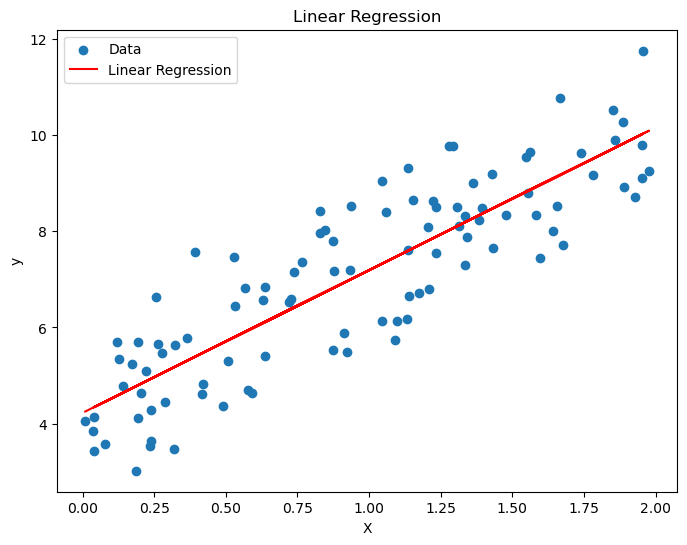

In [25]:
# Performing Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_linear, y_linear)
y_linear_pred = lin_reg.predict(X_linear)

# Plotting Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(X_linear, y_linear, label='Data')
plt.plot(X_linear, y_linear_pred, color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


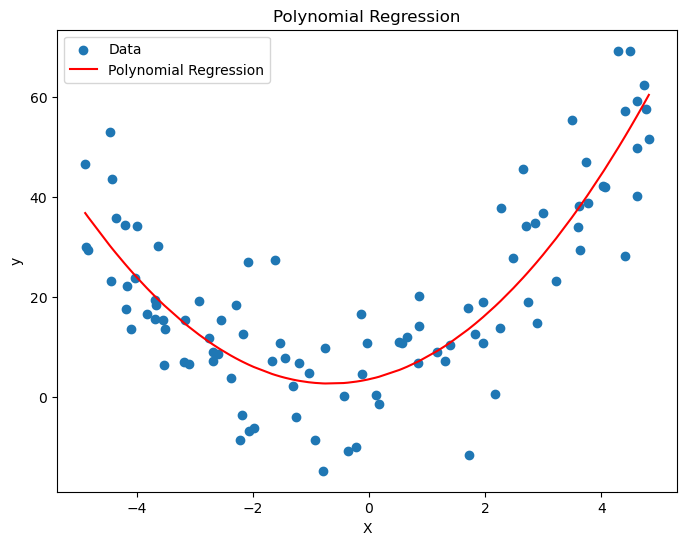

In [26]:
# Performing Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly_features.fit_transform(X_poly)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_transformed, y_poly)
y_poly_pred = poly_reg.predict(X_poly_transformed)

# Sorting the values for plotting a smooth curve
sorted_zip = sorted(zip(X_poly, y_poly_pred))
X_poly_sorted, y_poly_pred_sorted = zip(*sorted_zip)

# Plotting Polynomial Regression
plt.figure(figsize=(8, 6))
plt.scatter(X_poly, y_poly, label='Data')
plt.plot(X_poly_sorted, y_poly_pred_sorted, color='red', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Classification Models

We will now explore basic classification models using the generated classification data.

In [27]:
# Generating new data for classification with noise
from sklearn.datasets import make_classification

X_class, y_class = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_knn_pred)
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy}')

K-Nearest Neighbors Accuracy: 0.8333333333333334


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_tree_pred = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_tree_pred)
print(f'Decision Tree Accuracy: {tree_accuracy}')


Decision Tree Accuracy: 0.8


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_forest_pred = forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_forest_pred)
print(f'Random Forest Accuracy: {forest_accuracy}')

Random Forest Accuracy: 0.7666666666666667
